## Week3 授業前課題2 住宅情報の分析
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

Ames, Iowa - Wikipedia

Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

＜参考カーネル＞

Comprehensive data exploration with Python | Kaggle
（まずはここから）

House Prices : EDA to ML (Beginner) | Kaggle

A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle

データセットはKaggleからダウンロードします。

House Prices: Advanced Regression Techniques | Kaggle

上記URLを開き、Dataのページへ移動してください。

<img src="110c4ffdae2dba11c843ea21e97ff903.png">

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv") # データセットの取得
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

- アイオワ州エイムズ市の住宅のデータセット。
- 住宅の価格や敷地面積、築年数など79の項目があり、1460件分のデータがある。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

#### 各特徴量がどういったものかを見る。（数値データか文字データなど）

#### 今回の目的変数はどの列か確認する.
今回は住宅の価格が目的変数になるため、Sales Priceの列にあたる。

#### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: Missing data visualization module for Python.

- 欠損値が何パーセント含まれるかを確認する。

（例）
<img src="capture4.png">

- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

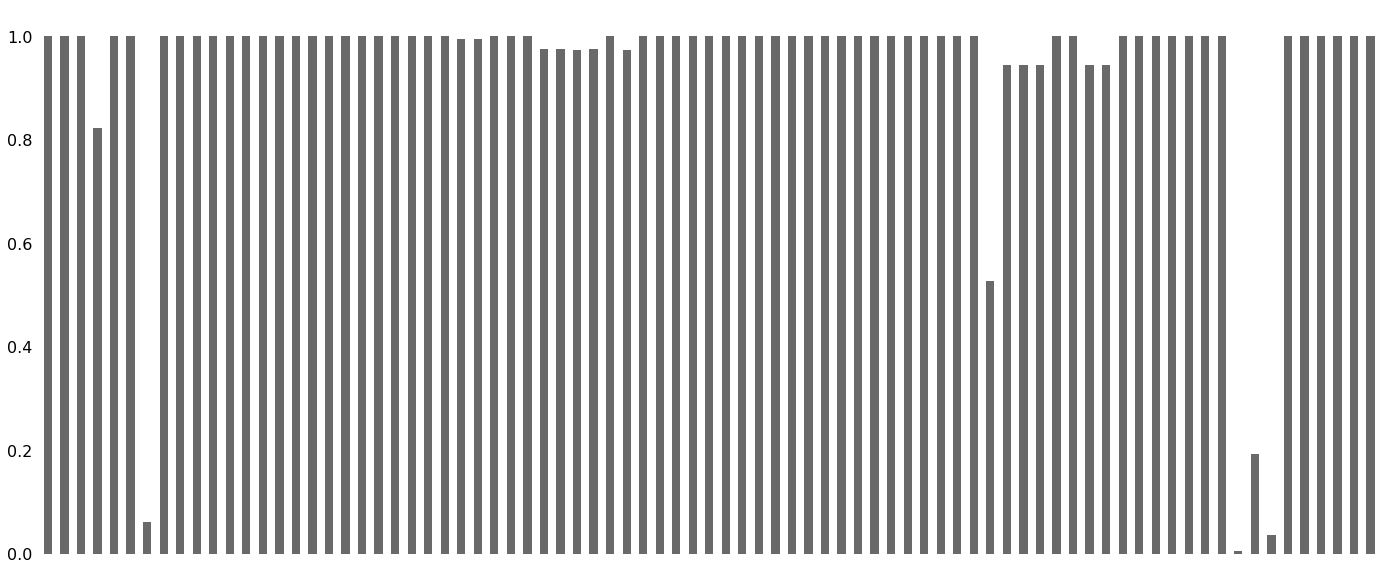

In [4]:
# 各特徴量の欠損値の有無を確認する
msno.bar(df)

In [5]:
# 欠損値が何パーセント含まれるかを確認する。

null_count = df.isnull().sum() # 欠損値の数を算出
null_rate = (null_count / len(df))*100 # 欠損率を算出

# データフレームを作成
null_table = pd.DataFrame({
    'Total': null_count,
    'missing_rate': null_rate
})

# 欠損値があるものだけ抜き出し欠損率でソート
null_table[null_table['Total'] > 0].sort_values(by='missing_rate', ascending=False)

,Total,missing_rate
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [6]:
# 5つ以上欠損値がある特徴量（列）は削除する。

# 欠損値が5つ以上あるインデックスを抽出
null_table = null_table[null_table['Total'] >= 5].sort_values(by='missing_rate', ascending=False)
delete_column = null_table.index # テーブルの行名(削除したい列名を取得

deleted_df1 = df.drop(delete_column, axis=1) # 取得した列名をデータフレームから削除

deleted_df1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [7]:
# 欠損値があるサンプル（行）は削除する。
deleted_df2 = deleted_df1.dropna(how='any')
deleted_df2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿

次は目的変数がどのような分布を持っているか確認していきます。

### 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

## 尖度
- 分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。
- サンプルサイズをn、各データを$ x_ {i}$(i:1, 2, 3, ・・・, n)の平均値を $\bar{x}$、標準偏差をsとすると尖度は次の式から求められる。
$$
\frac{n(n + 1)}{(n -1)(n - 2)(n - 3)}\sum_{i=1}^{n}\frac{(x_{i} - \bar{x})^4}{s^4} - \frac{3(n - 1)^2}{(n - 2)(n - 3)}
$$
- 正規分布の場合には0になり、正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとる。

## 歪度
- 分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。
- サンプルサイズをn、各データを$ x_ {i}$(i:1, 2, 3, ・・・, n)の平均値を $\bar{x}$、標準偏差をsとすると尖度は次の式から求められる。
$$
\frac{n}{(n -1)(n - 2)}\sum_{i=1}^{n}\left(\frac{(x_{i} - \bar{x})}{s}\right)^3
$$
- 「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとる。左右対称の分布（例えば正規分布）の場合には0になる。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

seaborn.distplot — seaborn 0.9.0 documentation

Kurtosis(尖度) : 6.529263049673958
Skewness(歪度) : 1.8819429948035529


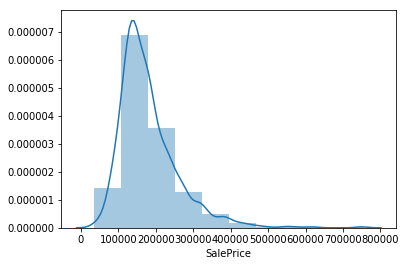

In [8]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

sns.distplot(deleted_df2["SalePrice"], bins=10) # 目的変数の分布を表示

print("Kurtosis(尖度) :", deleted_df2["SalePrice"].kurt()) # 尖度を算出
print("Skewness(歪度) :", deleted_df2["SalePrice"].skew()) # 歪度を算出

Kurtosis(尖度) : 0.806927847502148
Skewness(歪度) : 0.12131775882415026


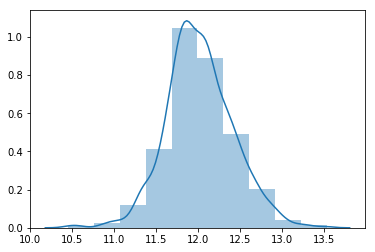

In [9]:
# 目的変数に対して対数変換を行う。
log_y = np.log(deleted_df2["SalePrice"].values) # 対数変換を行う
sns.distplot(log_y, bins=10) # 分布を表示
df_log_y =  pd.DataFrame(log_y, columns=["SalePrice"]) # データフレームに再変換

print("Kurtosis(尖度) : {}".format(df_log_y["SalePrice"].kurt())) # 尖度を算出
print("Skewness(歪度) : {}".format(df_log_y["SalePrice"].skew())) # 列度を算出

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

補足

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

#### 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

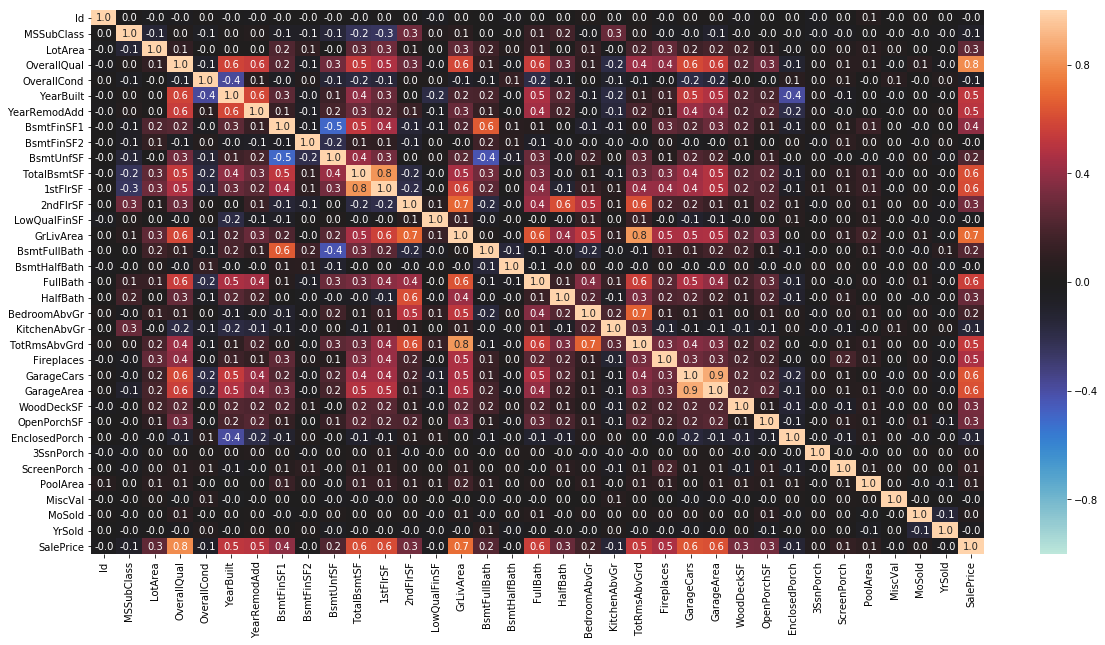

In [10]:
# ４つの特徴量に関する相関係数行列を作る
corr_mat = deleted_df2.corr(method='pearson') # 相関係数行列を作成

# 相関係数行列のヒートマップを描画
plt.figure(figsize=(20, 10))
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

#### 【考察】
- GrageCarsとGarageArea、1stFlrSFとTotalBsmtSF、TotRmsAbvGrdとGrLivArea、は相関係数が高い。
- EnclosedPorch、35snPorch、ScreenPorch、PoolArea、MiscVal、MoSold、YrSoldは他の項目と相関関係はほとんどない。

#### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

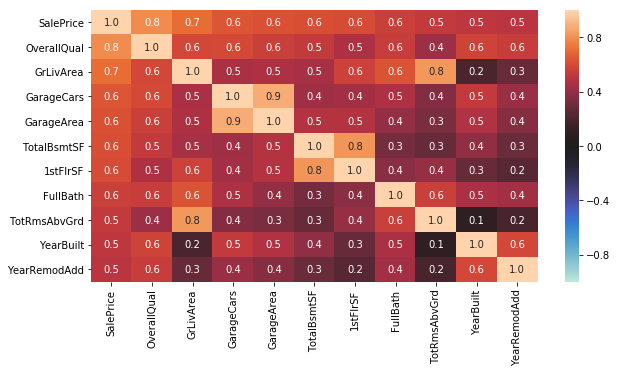

In [11]:
corr_mat2 = corr_mat.sort_values(by='SalePrice', ascending=False).sort_values(by='SalePrice', axis=1, ascending=False) # 相関係数の高い順に行列をソート
corr_mat2 = corr_mat2.iloc[:11, :11] # 目的変数以外に相関係数が高い特徴量を10個抜き出す
corr_mat2

# 相関係数行列のヒートマップを描画
plt.figure(figsize=(10, 5))
sns.heatmap(corr_mat2,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat2.columns.values,
            yticklabels=corr_mat2.columns.values
           )
plt.show()

#### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- OverallQual：住居全体の素材と仕上げ材の品質
- GrLivArea ：建物の地上面積（平方フィート）
- GarageCars :ガレージの駐車可能台数
- GarageArea ：ガレージの広さ（平方フィート）
- TotalBsmtSF ：敷地面積（平方フィート）
- 1stFlrSF ：1F部分の面積（平方フィート）
- FullBath ：地上の古バスルームの数
- TotRmsAbvGrd ：バスルームを除く地上の総部屋数
- YearBuilt ：築年数年
- YearRemodAdd ：リフォーム後の経過年数

#### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
GarageCarsとGarageArea、SalePriceとOverallQual、TotRmsAbvGrdとGarageAreaが相関係数が高い